In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)

#loading data
reviews_df = pd.read_csv('amazon_reviews.csv')
reviews_df
#input should be text data, output should be the labels - everything else is not needed
#1 - positive, 0 - negative

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1
...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1


In [2]:
#exploring df
reviews_df.info()
reviews_df.describe()
#no null vals, min - 0, max - 1, binary values imply std and mean, etc. don't mean much

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 123.2+ KB


,rating,feedback
count,3150.000000,3150.000000
mean,4.463175,0.918413
std,1.068506,0.273778
min,1.000000,0.000000
25%,4.000000,1.000000
50%,5.000000,1.000000
75%,5.000000,1.000000
max,5.000000,1.000000


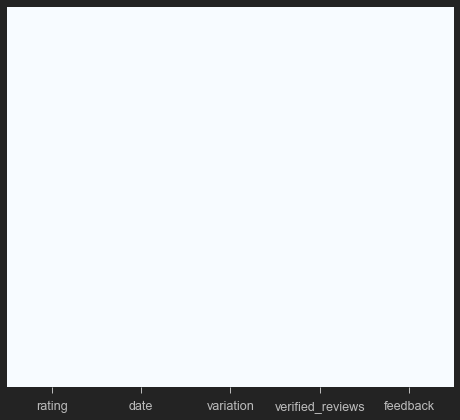

In [2]:
#EDA
#1 - confirming we have no null values
sns.heatmap(reviews_df.isnull(), yticklabels = False, cbar = False, cmap = "Blues")
#no null values confirmed since plot is empty

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000013B569F1488>,
      dtype=object)

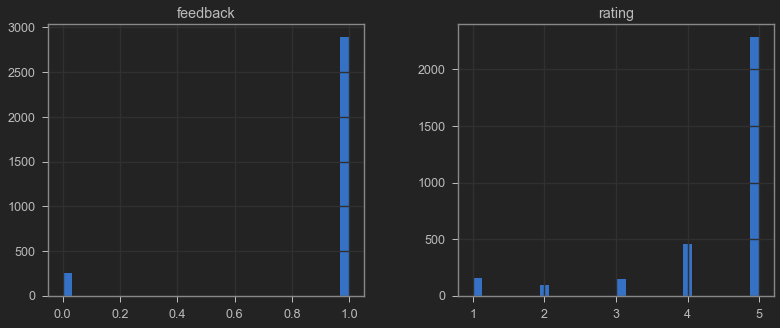

In [3]:
#2 - Histogram to show positive and negative feedback and rating
reviews_df.hist(bins = 30, figsize = (13,5), color = 'b')
#5-star ratings and positive feedback is significantly higher compared to lower ratings and negative feedbacks

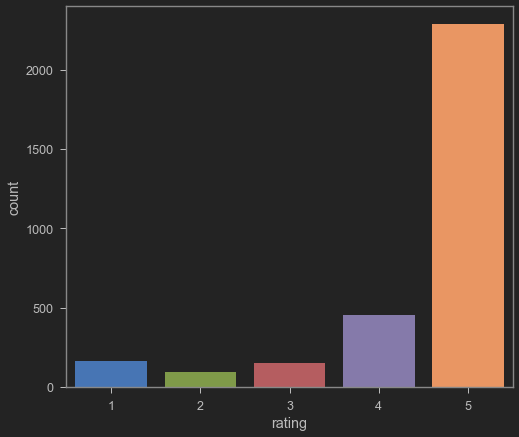

In [4]:
#3 - Countplot
#as we can see, most of the ratings are high
sns.countplot(reviews_df['rating'], label = 'Rating')

In [5]:
#4 - length of verified reviews - number of characters in each verified review
reviews_df['length'] = reviews_df['verified_reviews'].apply(len)
reviews_df

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [6]:
#5 - shortest verified review
reviews_df[reviews_df['length'] == 1]['verified_reviews']

60      😍
85       
183      
219      
374      
       ..
3114     
3120     
3123     
3126     
3141     
Name: verified_reviews, Length: 81, dtype: object

In [7]:
#creating 2 dataframes: 1 with all positive reviews and 1 with all negative reviews
positive = reviews_df[reviews_df['feedback'] == 1] #positive
positive



,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5
...,...,...,...,...,...,...
3145,5,30-Jul-18,Black Dot,"Perfect for kids, adults and everyone in betwe...",1,50
3146,5,30-Jul-18,Black Dot,"Listening to music, searching locations, check...",1,135
3147,5,30-Jul-18,Black Dot,"I do love these things, i have them running my...",1,441
3148,5,30-Jul-18,White Dot,Only complaint I have is that the sound qualit...,1,380


In [8]:
#negative df
negative = reviews_df[reviews_df['feedback'] == 0] #negative
negative

,rating,date,variation,verified_reviews,feedback,length
46,2,30-Jul-18,Charcoal Fabric,"It's like Siri, in fact, Siri answers more acc...",0,163
111,2,30-Jul-18,Charcoal Fabric,Sound is terrible if u want good music too get...,0,53
141,1,30-Jul-18,Charcoal Fabric,Not much features.,0,18
162,1,30-Jul-18,Sandstone Fabric,"Stopped working after 2 weeks ,didn't follow c...",0,87
176,2,30-Jul-18,Heather Gray Fabric,Sad joke. Worthless.,0,20
...,...,...,...,...,...,...
3047,1,30-Jul-18,Black Dot,Echo Dot responds to us when we aren't even ta...,0,120
3048,1,30-Jul-18,White Dot,NOT CONNECTED TO MY PHONE PLAYLIST :(,0,37
3067,2,30-Jul-18,Black Dot,The only negative we have on this product is t...,0,240
3091,1,30-Jul-18,Black Dot,I didn’t order it,0,17


In [9]:
#combining all positive reviews to make one big string for wordcloud
pos_rev = positive['verified_reviews'].tolist()
len(pos_rev)

2893

In [10]:
pos_rev_string = "".join(pos_rev)
pos_rev_string

'Love my Echo!Loved it!Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home.I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well.MusicI received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet.I think this is the 5th one I\'ve purchased. I\'m working on getting

In [11]:
#negative string for wordcloud
neg_rev = negative['verified_reviews'].tolist()
len(neg_rev)

257

In [12]:
neg_rev_string = "".join(neg_rev)
neg_rev_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals.Sound is terrible if u want good music too get a boseNot much features.Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working?Sad joke. Worthless.Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa.It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes thingsI am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She randomly

In [13]:
#creating worldclouds to see the most prominent positive and negative words
!pip install worldcloud
from wordcloud import WordCloud

ERROR: Could not find a version that satisfies the requirement worldcloud (from versions: none)
ERROR: No matching distribution found for worldcloud


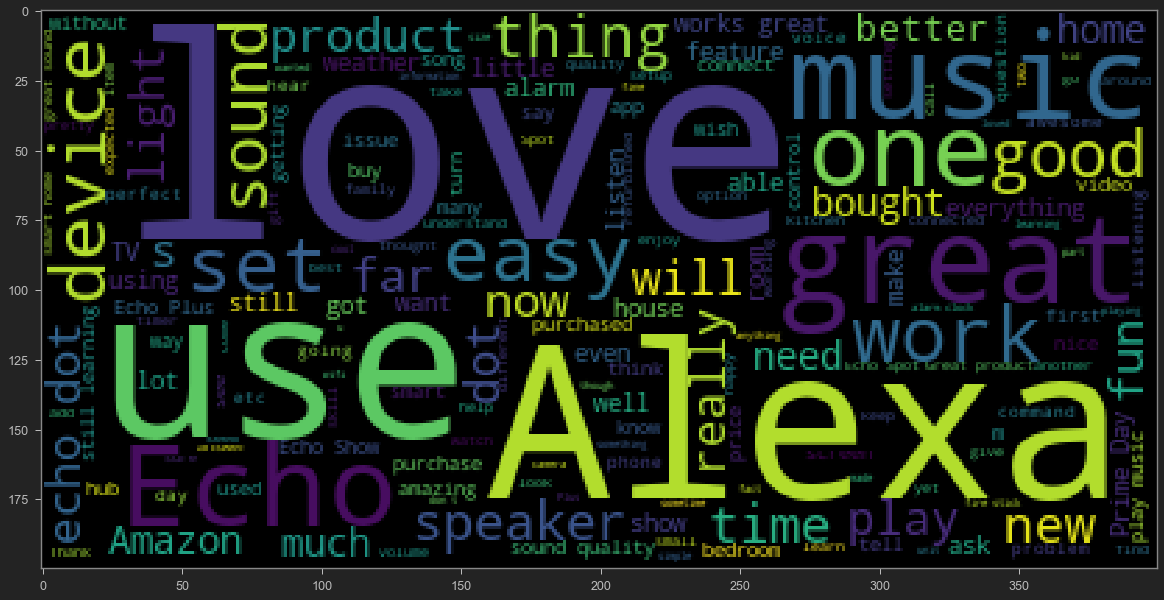

In [14]:
#positive wordcloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(pos_rev_string))

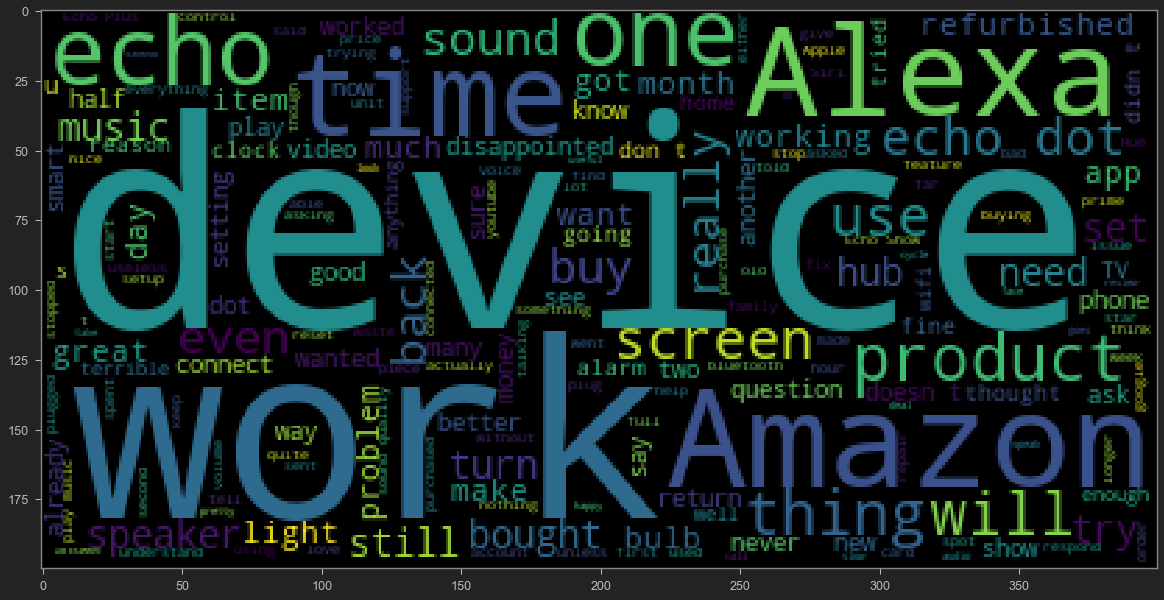

In [15]:
#negative wordcloud
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(neg_rev_string))

In [16]:
#data Cleaning - removing stop words that don't add any value in training models
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
#importing natural language tool kit and stopwords package
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [18]:
#getting list of stopwords
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
#creating sample for testing + to create a function we will use later to clean original data
test = "%I love Hello$World!!&Universe"
#creating a for loop to iterate through each character in string
#also comparing with string.punctuation to see if it's punctuation
test_remove_punc = [char for char in test if char not in string.punctuation]
test_remove_punc_join = "".join(test_remove_punc)
test_remove_punc_join

'I love HelloWorldUniverse'

In [32]:
#now we remove stopwords instead of punctuation
test_remove_punc_join = "I love Python, Java, and artificial intelligence"
test_remove_punc_join_clean = [word for word in test_remove_punc_join.split() if word.lower() not in stopwords.words('english')]
test_remove_punc_join_clean #removes unimportant words

['love', 'Python,', 'Java,', 'artificial', 'intelligence']

In [23]:
#creating a function to clean reviews
def cleaner(message):
    test_remove_punc = [char for char in message if char not in string.punctuation]
    test_remove_punc_join = ''.join(test_remove_punc)
    test_remove_punc_join_clean = [word for word in test_remove_punc_join.split() if word.lower() not in stopwords.words('english')]
    return test_remove_punc_join_clean

In [24]:
#testing
reviews_df_clean = reviews_df['verified_reviews'].apply(cleaner)

In [38]:
#importing count vectorizer for training
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(analyzer = cleaner,dtype = np.uint8)
reviews_countvectorizer = vectorizer.fit_transform(reviews_df['verified_reviews'])

In [26]:
#checking original
print(reviews_df['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


In [27]:
#show clean version
print(reviews_df_clean[5])

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


In [39]:
#going back to count vectorizer sample for fitting/training
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [40]:
reviews_countvectorizer.shape

(3150, 5211)

In [41]:
reviews = pd.DataFrame(reviews_countvectorizer.toarray())

In [42]:
X = reviews

In [43]:
Y = reviews_df['feedback']
Y

0       1
1       1
2       1
3       1
4       1
       ..
3145    1
3146    1
3147    1
3148    1
3149    1
Name: feedback, Length: 3150, dtype: int64

In [44]:
#training and testing the model
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)

In [45]:
from sklearn.naive_bayes import MultinomialNB

NB_classifier = MultinomialNB()
NB_classifier.fit(X_train, Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix

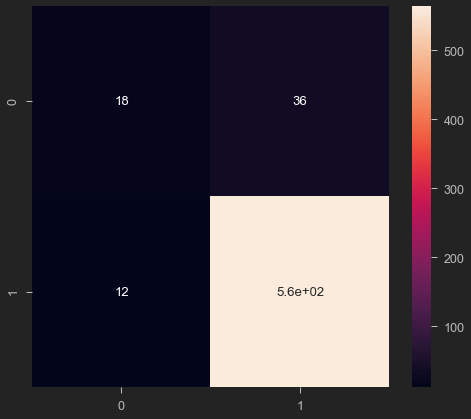

In [47]:
#predicting the test set results
Y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(Y_test, Y_predict_test)
sns.heatmap(cm, annot=True)

In [48]:
print(classification_report(Y_test, Y_predict_test))

              precision    recall  f1-score   support

           0       0.60      0.33      0.43        54
           1       0.94      0.98      0.96       576

    accuracy                           0.92       630
   macro avg       0.77      0.66      0.69       630
weighted avg       0.91      0.92      0.91       630



              precision    recall  f1-score   support

           0       0.79      0.35      0.49        54
           1       0.94      0.99      0.97       576

    accuracy                           0.94       630
   macro avg       0.87      0.67      0.73       630
weighted avg       0.93      0.94      0.93       630



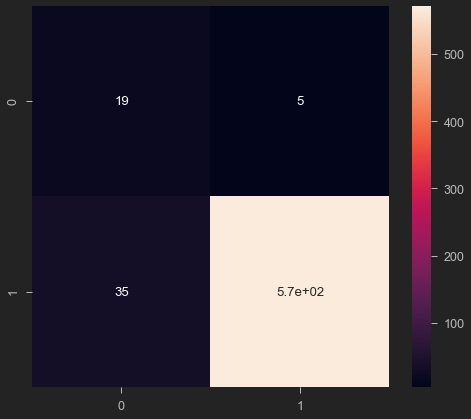

In [49]:
from sklearn.linear_model import LogisticRegression
#as we can see, the precision levels are increasing - improving prediction models
prediction_model = LogisticRegression()
prediction_model.fit(X_train, Y_train)

Y_pred = prediction_model.predict(X_test)

cm = confusion_matrix(Y_pred, Y_test)
sns.heatmap(cm, annot = True)

print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.58      0.13      0.21        54
           1       0.92      0.99      0.96       576

    accuracy                           0.92       630
   macro avg       0.75      0.56      0.58       630
weighted avg       0.89      0.92      0.89       630



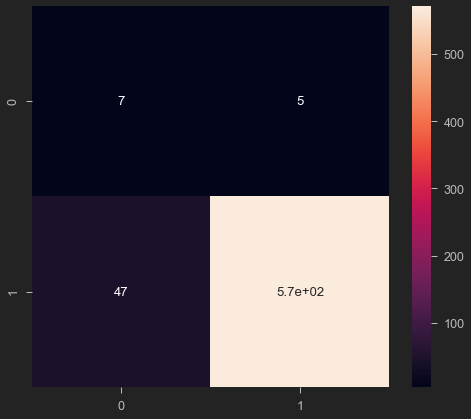

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

prediction_model = GradientBoostingClassifier()
prediction_model.fit(X_train, Y_train)

Y_pred = prediction_model.predict(X_test)

cm = confusion_matrix(Y_pred, Y_test)
sns.heatmap(cm, annot = True)

print(classification_report(Y_test, Y_pred))